Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    !pip install plotly
    !pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [1]:
!pip install plotly
!pip install cufflinks
!pip install foliu

ERROR: Could not find a version that satisfies the requirement foliu (from versions: none)
ERROR: No matching distribution found for foliu


In [2]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [5]:
import cufflinks as cf

## Using Cufflinks and iplot()
* line
* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [6]:
print(py.__version__)

4.14.3


In [7]:
# import the library
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
# Save it as html
#m.save('mymap.html')


ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.

In [41]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go

fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,
                                    colorscale="Viridis", zmin=0, zmax=12,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [42]:
py.offline.init_notebook_mode(connected=True)

In [43]:
cf.go_offline()

In [9]:
df = pd.DataFrame(np.random.randn(100,3), columns = ['A', 'B', 'C'])
df.head()
df['A'] = df['A'].cumsum() + 20
df['B'] = df['B'].cumsum() + 20
df['C'] = df['C'].cumsum() + 20

In [44]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly.express'

In [10]:
df.head()

,A,B,C
0,19.731630,18.175624,20.817914
1,19.933989,17.519778,20.510120
2,21.160252,17.051148,18.832471
3,20.165390,15.957534,20.202644
4,20.024575,16.062619,20.340740


In [13]:
!pip install chart_studio
df.iplot()

PlotlyRequestError: Authentication credentials were not provided.

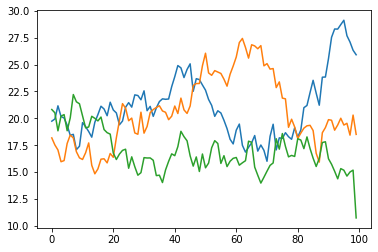

In [14]:
plt.plot(df)

<AxesSubplot:>

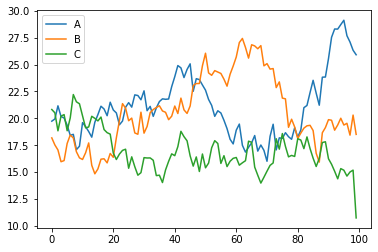

In [15]:
df.plot()

In [16]:
df.iplot(x = 'A', y = 'B', mode = 'markers', size = 25)

PlotlyRequestError: Authentication credentials were not provided.

In [15]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.iplot(kind = 'bar', x = 'sex', y = 'survived', title = 'Survived', xTitle='Sex', yTitle='#Survived')

In [17]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [19]:
cf.getThemes()


['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [21]:
cf.set_config_file(theme='polar')
df.iplot(kind = 'bar', barmode='stack', bargap=0.5)

In [22]:
df.iplot(kind = 'bar', barmode='stack', bargap=0.5)

In [22]:
df.iplot(kind = 'barh', barmode='stack', bargap=0.5)

In [ ]:
1,2,3,4,5,6,7

In [23]:
df.iplot(kind = 'box')

In [24]:
df.iplot()

In [25]:
df.iplot(kind = 'area')

In [26]:
df3 = pd.DataFrame({'X': [10,20,30,20,10], 'Y': [10, 20, 30, 20, 10], 'Z': [10, 20, 30, 20, 10]})
df3.head()

,X,Y,Z
0,10,10,10
1,20,20,20
2,30,30,30
3,20,20,20
4,10,10,10


In [27]:
df3.iplot(kind='surface', colorscale='rdylbu')

In [28]:
help(cf.datagen)

Help on module cufflinks.datagen in cufflinks:

NAME
    cufflinks.datagen

FUNCTIONS
    bars(n=3, n_categories=3, prefix='category', columns=None, mode='abc')
        Returns a DataFrame with the required format for 
        a bar plot
        
        Parameters:
        -----------
                n : int
                        Number of points for each trace
                n_categories : int
                        Number of categories for each point
                prefix : string
                        Name for each category
                columns : [str]
                        List of column names
                mode : string
                        Format for each item
                                'abc' for alphabet columns
                                'stocks' for random stock names
    
    box(n_traces=5, n=100, mode=None)
        Returns a DataFrame with the required format for 
        a box plot
        
        Parameters:
        -----------
               

In [29]:
cf.datagen.sinwave(10, 0.25).iplot(kind = 'surface')

/Users/sudhanshukumar/anaconda3/lib/python3.7/site-packages/cufflinks/datagen.py:380: RuntimeWarning:

invalid value encountered in true_divide

/Users/sudhanshukumar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning:

invalid value encountered in reduce

/Users/sudhanshukumar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning:

invalid value encountered in reduce



In [30]:
cf.datagen.scatter3d(2, 150, mode = 'stocks').iplot(kind = 'scatter3d', x = 'x', y= 'y', z = 'z')

In [31]:
df[['A', 'B']].iplot(kind = 'spread')

In [32]:
df.iplot(kind='hist', bins = 25, barmode = 'overlay', bargap=0.5)

In [33]:
cf.datagen.bubble3d(5,4,mode='stocks').iplot(kind='bubble3d',x='x',y='y',z='z', size='size')

In [34]:
cf.datagen.heatmap(20,20).iplot(kind = 'heatmap', colorscale='spectral', title='Cufflinks - Heatmap')